### Descrição

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('../Data/facies_vectors.csv')
print(df.shape)
df.head()

(4149, 11)


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     4149 non-null   int64  
 1   Formation  4149 non-null   object 
 2   Well Name  4149 non-null   object 
 3   Depth      4149 non-null   float64
 4   GR         4149 non-null   float64
 5   ILD_log10  4149 non-null   float64
 6   DeltaPHI   4149 non-null   float64
 7   PHIND      4149 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       4149 non-null   int64  
 10  RELPOS     4149 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 356.7+ KB


In [4]:
100*df.isnull().sum()/df.shape[0]

Facies        0.000000
Formation     0.000000
Well Name     0.000000
Depth         0.000000
GR            0.000000
ILD_log10     0.000000
DeltaPHI      0.000000
PHIND         0.000000
PE           22.101711
NM_M          0.000000
RELPOS        0.000000
dtype: float64

In [5]:
df[df['PE'].isnull()]['Well Name'].unique().tolist()

['ALEXANDER D', 'KIMZEY A', 'Recruit F9']

In [6]:
df['Well Name'].unique().tolist()

['SHRIMPLIN',
 'ALEXANDER D',
 'SHANKLE',
 'LUKE G U',
 'KIMZEY A',
 'CROSS H CATTLE',
 'NOLAN',
 'Recruit F9',
 'NEWBY',
 'CHURCHMAN BIBLE']

In [7]:
np.sort(df['Facies'].unique().tolist())

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
original_values = np.sort(df['Facies'].unique().tolist())
mapped_values = np.arange(0,9)
value_map = dict(zip(original_values, mapped_values))
value_map

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8}

In [9]:
train = df.loc[df['Well Name']!='SHRIMPLIN']
train['Well Name'].unique()

array(['ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE',
       'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE'], dtype=object)

In [10]:
test = df.loc[df['Well Name'] =='SHRIMPLIN']
test['Well Name'].unique()

array(['SHRIMPLIN'], dtype=object)

In [11]:
Xtrain = train.drop(['Facies', 'Well Name', 'Facies'], axis=1)
ytrain = train['Facies'].map(value_map)

Xtest = test.drop(['Facies', 'Well Name', 'Facies'], axis=1)
ytest = test['Facies'].map(value_map)

In [12]:
np.sort(pd.unique(ytrain))

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [13]:
np.sort(pd.unique(ytest))

array([1, 2, 3, 4, 5, 6, 7, 8])

In [14]:
numeric_cols = Xtrain.select_dtypes(include='int64' and 'float64').columns.tolist()
numeric_cols

['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'RELPOS']

In [15]:
categorical_cols = Xtrain.select_dtypes(include='object').columns.tolist()
categorical_cols

['Formation']

In [16]:
Xtrain = Xtrain[numeric_cols + categorical_cols]
Xtrain.head()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,RELPOS,Formation
471,2887.5,88.71,0.612,6.7,10.605,NaN,1.000,A1 SH
472,2888.0,92.71,0.583,11.0,12.515,NaN,0.974,A1 SH
473,2888.5,94.54,0.579,12.0,13.410,NaN,0.949,A1 SH
474,2889.0,95.31,0.579,11.5,13.750,NaN,0.923,A1 SH
475,2889.5,93.79,0.572,10.3,13.405,NaN,0.897,A1 SH


In [17]:
Xtest = Xtest[numeric_cols + categorical_cols]
Xtest.head()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,RELPOS,Formation
0,2793.0,77.45,0.664,9.9,11.915,4.6,1.000,A1 SH
1,2793.5,78.26,0.661,14.2,12.565,4.1,0.979,A1 SH
2,2794.0,79.05,0.658,14.8,13.050,3.6,0.957,A1 SH
3,2794.5,86.10,0.655,13.9,13.115,3.5,0.936,A1 SH
4,2795.0,74.58,0.647,13.5,13.300,3.4,0.915,A1 SH


In [18]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, f1_score
from category_encoders import OneHotEncoder
import optuna  

from sklearn.model_selection import StratifiedKFold

import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [19]:
encoder = OneHotEncoder(cols=categorical_cols)

Xtrain_encoded = encoder.fit_transform(Xtrain)
Xtest_encoded = encoder.transform(Xtest)

In [20]:
Xtest_encoded.head()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,RELPOS,Formation_1,Formation_2,Formation_3,...,Formation_5,Formation_6,Formation_7,Formation_8,Formation_9,Formation_10,Formation_11,Formation_12,Formation_13,Formation_14
0,2793.0,77.45,0.664,9.9,11.915,4.6,1.000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2793.5,78.26,0.661,14.2,12.565,4.1,0.979,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2794.0,79.05,0.658,14.8,13.050,3.6,0.957,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2794.5,86.10,0.655,13.9,13.115,3.5,0.936,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2795.0,74.58,0.647,13.5,13.300,3.4,0.915,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
ova_model = joblib.load('Models/ova.pkl')
ovo_model = joblib.load('Models/ovo.pkl')

In [22]:
ova_model.fit(Xtrain_encoded, ytrain)
ovo_model.fit(Xtrain_encoded, ytrain)

OneVsOneClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=1.0,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.021379942187754034,
                                           max_bin=None, max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=5,
                                           max_leaves=None, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=3740, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...))

In [23]:
ova_preds = ova_model.predict(Xtest_encoded)
ovo_preds = ovo_model.predict(Xtest_encoded)

In [24]:
np.unique(ova_preds)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [25]:
np.unique(ytest)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [40]:
# Classification report for OvA model
ova_preds

array([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 2, 1, 1, 2, 2, 2, 2, 4,
       7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 3, 3, 3, 7,
       7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 7, 7, 5, 7, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 7, 1, 7, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 2, 5, 5, 7, 7, 7, 7, 7, 8, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 7, 7, 7, 8, 7, 7, 7, 7, 8, 8, 8, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 5, 7, 7, 7, 7, 5, 5, 4, 5, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report for OvA model
print("OvA Model Metrics:")
print(classification_report(ytest, ova_preds, zero_division=1))

# Classification report for OvO model
print("OvO Model Metrics:")
print(classification_report(ytest, ovo_preds, zero_division=1))

OvA Model Metrics:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.62      0.71      0.66       118
           2       0.69      0.55      0.62       123
           3       0.54      0.72      0.62        18
           4       0.50      0.10      0.16        63
           5       0.50      0.81      0.61        63
           6       0.33      0.20      0.25         5
           7       0.65      0.59      0.62        69
           8       0.43      1.00      0.60        12

    accuracy                           0.59       471
   macro avg       0.47      0.63      0.46       471
weighted avg       0.60      0.59      0.56       471

OvO Model Metrics:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.64      0.74      0.69       118
           2       0.73      0.58      0.65       123
           3       0.39      0.61      0

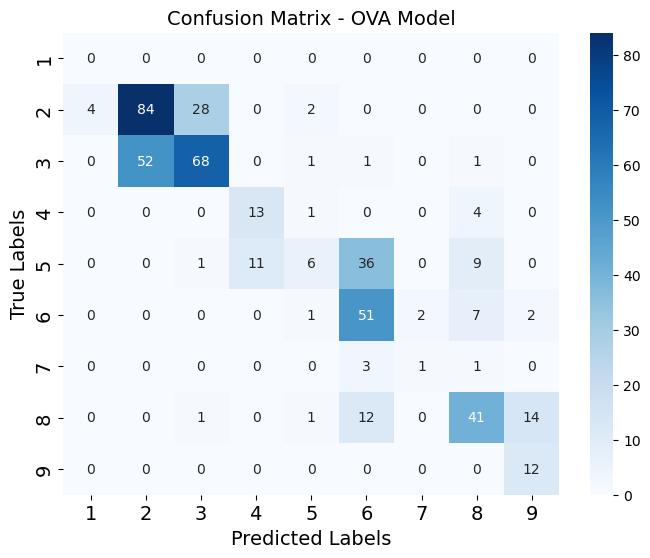

In [27]:
import seaborn as sns

# Define class labels (if available)
class_labels = list(np.arange(1,10))

# Calculate the confusion matrix for OVA model
ova_cm = confusion_matrix(ytest, ova_preds)

# Plot the confusion matrix for OVA model
plt.figure(figsize=(8, 6))
sns.heatmap(ova_cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - OVA Model", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(f'Test_Figures/OvA_cm.png', dpi=300)
plt.show()

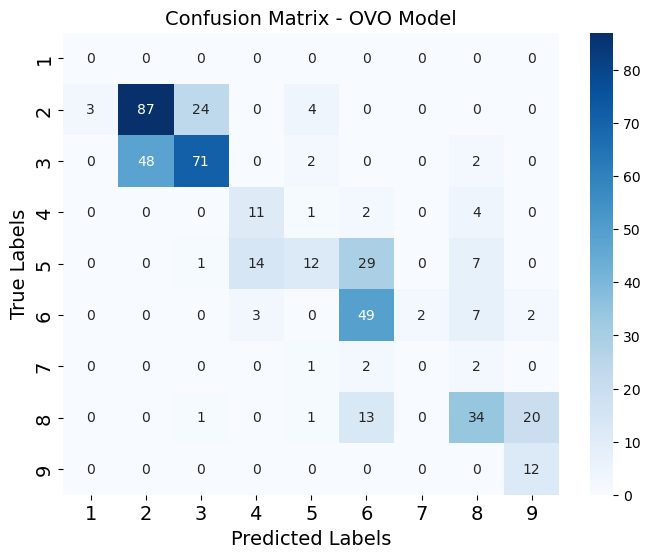

In [28]:
ovo_cm = confusion_matrix(ytest, ovo_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(ovo_cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - OVO Model", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(f'Test_Figures/OvO_cm.png', dpi=300)

plt.show()

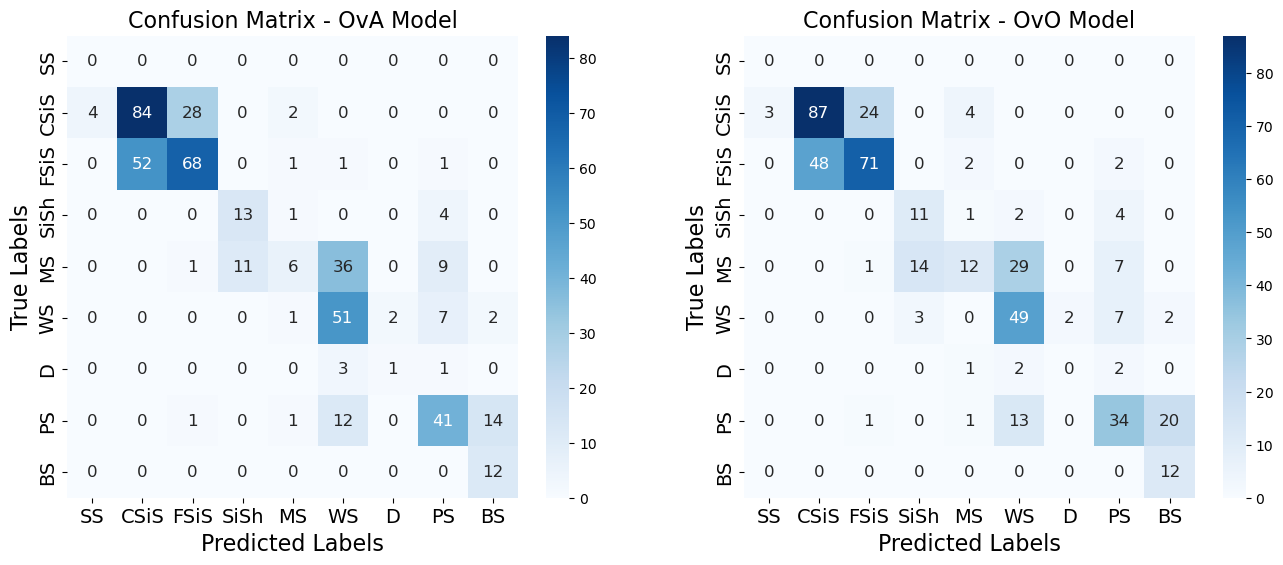

In [29]:
# Define class labels (if available)
# class_labels = list(np.arange(1, 10))
class_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']

# Calculate the confusion matrix for OVA model
ova_cm = confusion_matrix(ytest, ova_preds)

# Calculate the confusion matrix for OVO model (replace 'ovo_preds' and 'ytest' with the appropriate variables)
ovo_cm = confusion_matrix(ytest, ovo_preds)

# Plot both confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for OVA model
sns.heatmap(ova_cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, 
            yticklabels=class_labels, ax=axes[0], annot_kws={"fontsize": 12})
axes[0].set_title("Confusion Matrix - OvA Model", fontsize=16)
axes[0].set_xlabel("Predicted Labels", fontsize=16)
axes[0].set_ylabel("True Labels", fontsize=16)
axes[0].tick_params(labelsize=14)


# Plot for OVO model
sns.heatmap(ovo_cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, 
            yticklabels=class_labels, ax=axes[1], annot_kws={"fontsize": 12})
axes[1].set_title("Confusion Matrix - OvO Model", fontsize=16)
axes[1].set_xlabel("Predicted Labels", fontsize=16)
axes[1].set_ylabel("True Labels", fontsize=16)
axes[1].tick_params(labelsize=14)
plt.savefig(f'Test_Figures/OvA_OvO_cm.png', dpi=300)

plt.show()

In [30]:
# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

#def label_facies(row, labels):
#    return labels[ row['Facies'] -1]
    
#training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
#training_data.describe()

In [31]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_facies_log_plot(logs, facies_colors, actual_facies, predicted_facies):
    # make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')

    ztop = logs.Depth.min()
    zbot = logs.Depth.max()

    cluster_actual = np.repeat(np.expand_dims(actual_facies, 1), 100, 1)
    cluster_predicted = np.repeat(np.expand_dims(predicted_facies, 1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(10, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im_actual = ax[5].imshow(cluster_actual, interpolation='none', aspect='auto',
                            cmap=cmap_facies, vmin=1, vmax=9)
    im_predicted = ax[6].imshow(cluster_predicted, interpolation='none', aspect='auto',
                               cmap=cmap_facies, vmin=1, vmax=9)

    divider_actual = make_axes_locatable(ax[5])
    cax_actual = divider_actual.append_axes("right", size="20%", pad=0.05)
    cbar_actual = plt.colorbar(im_actual, cax=cax_actual)
    cbar_actual.set_label((17 * ' ').join([' SS ', 'CSiS', 'FSiS',
                                           'SiSh', ' MS ', ' WS ', ' D  ',
                                           ' PS ', ' BS ']))
    cbar_actual.set_ticks(range(0, 1))
    cbar_actual.set_ticklabels('')

    divider_predicted = make_axes_locatable(ax[6])
    cax_predicted = divider_predicted.append_axes("right", size="20%", pad=0.05)
    cbar_predicted = plt.colorbar(im_predicted, cax=cax_predicted)
    cbar_predicted.set_label((17 * ' ').join([' SS ', 'CSiS', 'FSiS',
                                              'SiSh', ' MS ', ' WS ', ' D  ',
                                              ' PS ', ' BS ']))
    cbar_predicted.set_ticks(range(0, 1))
    cbar_predicted.set_ticklabels('')

    for i in range(len(ax) - 2):
        ax[i].set_ylim(ztop, zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(), logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(), logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(), logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(), logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(), logs.PE.max())
    ax[5].set_xlabel('Actual Facies')
    ax[6].set_xlabel('Predicted Facies')

    ax[1].set_yticklabels([])
    ax[2].set_yticklabels([])
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([])
    ax[5].set_yticklabels([])
    ax[6].set_yticklabels([])

    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])

    f.suptitle('Well: %s' % logs.iloc[0]['Well Name'], fontsize=14, y=0.94)


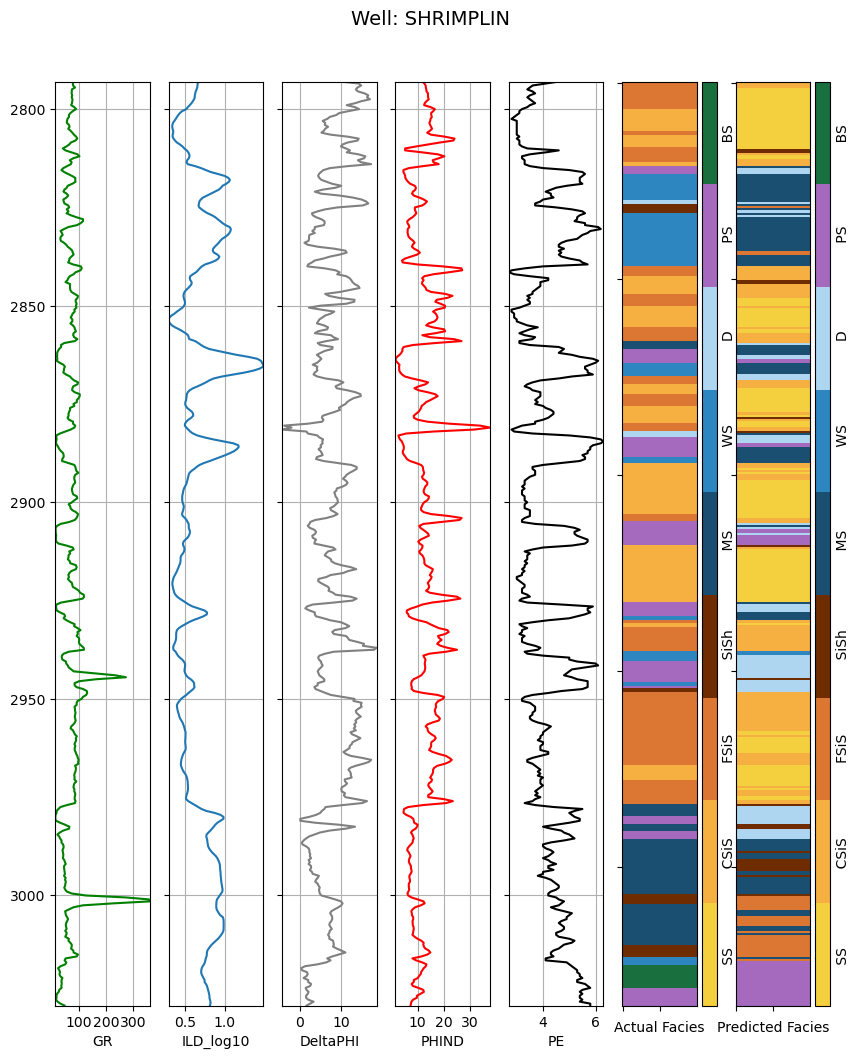

In [32]:
make_facies_log_plot(
    test,
    facies_colors,
    test.Facies,
    ovo_preds)

In [33]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_facies_log_plot(logs, facies_colors, actual_facies, ova_predicted_facies, ovo_predicted_facies):
    # make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')

    ztop = logs.Depth.min()
    zbot = logs.Depth.max()

    cluster_ova_predicted = np.repeat(np.expand_dims(ova_predicted_facies, 1), 100, 1)
    cluster_ovo_predicted = np.repeat(np.expand_dims(ovo_predicted_facies, 1), 100, 1)
    cluster_actual = np.repeat(np.expand_dims(actual_facies, 1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(15, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im_ova_predicted = ax[5].imshow(cluster_ova_predicted, interpolation='none', aspect='auto',
                                    cmap=cmap_facies, vmin=1, vmax=9)
    im_ovo_predicted = ax[6].imshow(cluster_ovo_predicted, interpolation='none', aspect='auto',
                                    cmap=cmap_facies, vmin=1, vmax=9)
    im_actual = ax[7].imshow(cluster_actual, interpolation='none', aspect='auto',
                            cmap=cmap_facies, vmin=1, vmax=9)

    divider_ova_predicted = make_axes_locatable(ax[5])
    cax_ova_predicted = divider_ova_predicted.append_axes("right", size="5%", pad=0.05)
    cbar_ova_predicted = plt.colorbar(im_ova_predicted, cax=cax_ova_predicted)
    cbar_ova_predicted.remove()  # Remove OvA predicted facies colorbar

    divider_ovo_predicted = make_axes_locatable(ax[6])
    cax_ovo_predicted = divider_ovo_predicted.append_axes("right", size="5%", pad=0.05)
    cbar_ovo_predicted = plt.colorbar(im_ovo_predicted, cax=cax_ovo_predicted)
    cbar_ovo_predicted.remove()  # Remove OvO predicted facies colorbar

    divider_actual = make_axes_locatable(ax[7])
    cax_actual = divider_actual.append_axes("right", size="20%", pad=0.05)
    cbar_actual = plt.colorbar(im_actual, cax=cax_actual)
    cbar_actual.set_label((17 * ' ').join([' SS ', 'CSiS', 'FSiS',
                                           'SiSh', ' MS ', ' WS ', ' D  ',
                                           ' PS ', ' BS ']))
    cbar_actual.set_ticks(range(0, 1))
    cbar_actual.set_ticklabels('')

    for i in range(len(ax) - 3):
        ax[i].set_ylim(ztop, zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(), logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(), logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(), logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(), logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(), logs.PE.max())
    ax[5].set_xlabel('OvA Facies')
    ax[6].set_xlabel('OvO Facies')
    ax[7].set_xlabel('Actual Facies')

    ax[1].set_yticklabels([])
    ax[2].set_yticklabels([])
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([])
    ax[5].set_yticklabels([])
    ax[6].set_yticklabels([])
    ax[7].set_yticklabels([])

    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    ax[7].set_xticklabels([])

    f.suptitle('Well: %s' % logs.iloc[0]['Well Name'], fontsize=14, y=0.94)


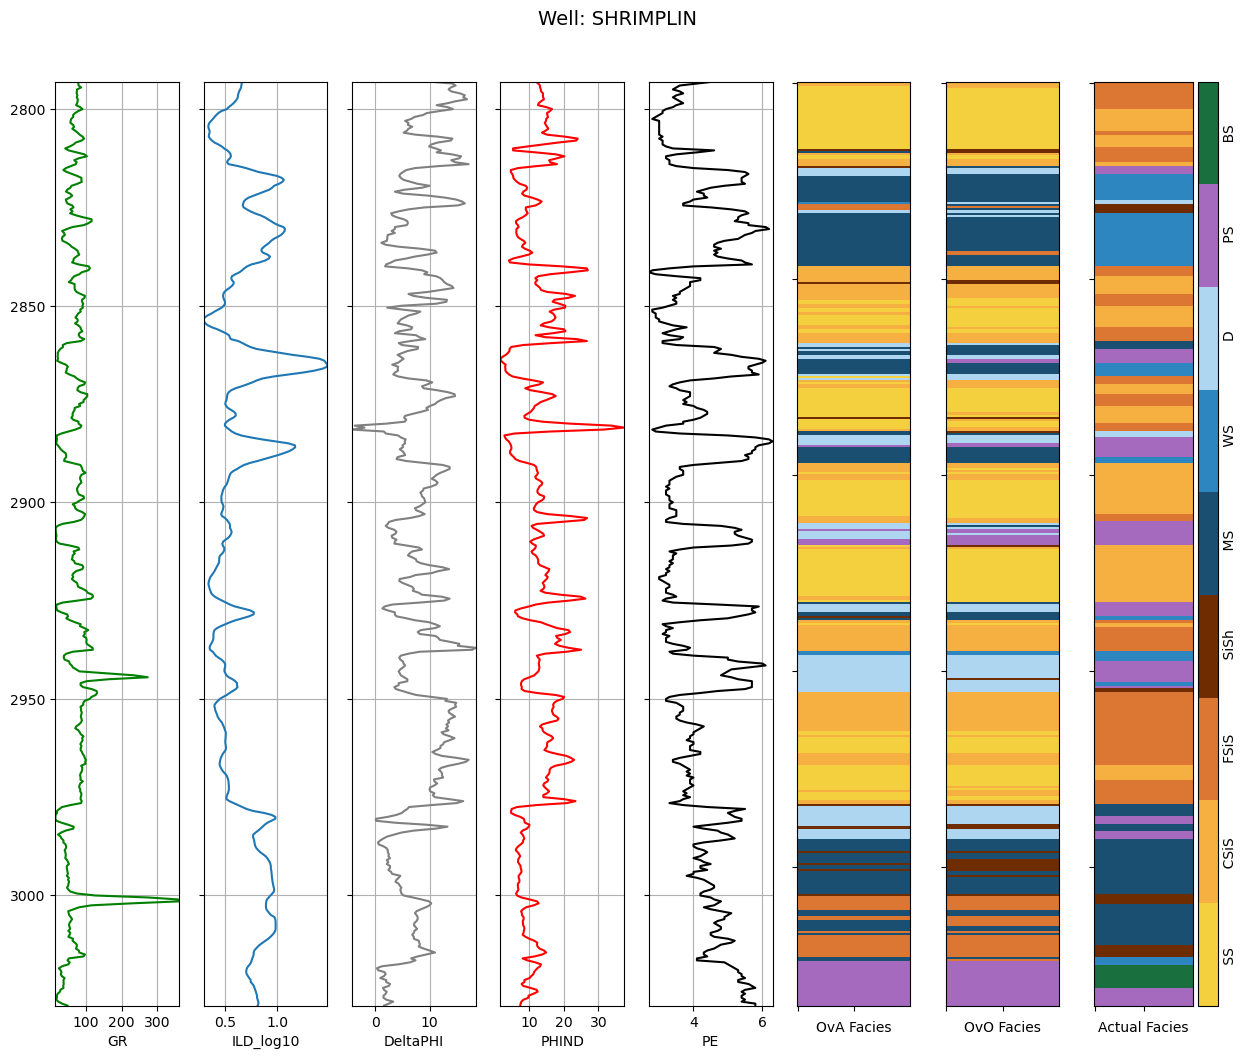

In [34]:
make_facies_log_plot(
    test,
    facies_colors,
    test.Facies,
    ova_preds,
    ovo_preds)